<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [4]:
import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [5]:
# Read CSV
house_csv = "../../DATA/Sacramento_transactions.csv"

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [6]:
# ANSWER
df=pd.read_csv(house_csv)

In [7]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [8]:
df.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [9]:
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [10]:
df.shape


(985, 12)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [12]:
df.city.unique()

array(['SACRAMENTO', 'RANCHO CORDOVA', 'RIO LINDA', 'CITRUS HEIGHTS',
       'NORTH HIGHLANDS', 'ANTELOPE', 'ELK GROVE', 'ELVERTA', 'GALT',
       'CARMICHAEL', 'ORANGEVALE', 'FOLSOM', 'MATHER', 'POLLOCK PINES',
       'GOLD RIVER', 'EL DORADO HILLS', 'RANCHO MURIETA', 'WILTON',
       'GREENWOOD', 'FAIR OAKS', 'CAMERON PARK', 'LINCOLN', 'PLACERVILLE',
       'MEADOW VISTA', 'ROSEVILLE', 'ROCKLIN', 'AUBURN', 'LOOMIS',
       'EL DORADO', 'PENRYN', 'GRANITE BAY', 'FORESTHILL',
       'DIAMOND SPRINGS', 'SHINGLE SPRINGS', 'COOL', 'WALNUT GROVE',
       'GARDEN VALLEY', 'SLOUGHHOUSE', 'WEST SACRAMENTO'], dtype=object)

In [13]:
df['type'].unique()
   # 'Unkown" need change 

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [14]:
df[df['type'] == 'Unkown']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
757,6007 MARYBELLE LN,SHINGLE SPRINGS,95682,CA,0,0,0,Unkown,Fri May 16 00:00:00 EDT 2008,275000,38.64347,-120.888183


In [15]:
#changing to unknown

df.iloc[757,7] ='Unknown'

In [16]:
df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unknown'], dtype=object)

In [17]:
df.groupby('type')["price"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Condo,54.0,150082.185185,74431.071849,40000.0,98500.0,130000.0,205208.0,360000.0
Multi-Family,13.0,224534.692308,85061.706748,100000.0,170000.0,221250.0,282400.0,416767.0
Residential,917.0,239186.162486,140377.574005,1551.0,150000.0,218000.0,305000.0,884790.0
Unknown,1.0,275000.000000,NaN,275000.0,275000.0,275000.0,275000.0,275000.0


In [18]:
df.iloc[757,7] = 'Residential' # changing unknown to residential

In [19]:
df.groupby('type')["price"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Condo,54.0,150082.185185,74431.071849,40000.0,98500.0,130000.0,205208.0,360000.0
Multi-Family,13.0,224534.692308,85061.706748,100000.0,170000.0,221250.0,282400.0,416767.0
Residential,918.0,239225.175381,140305.990585,1551.0,150000.0,218500.0,305000.0,884790.0


In [20]:
df.isna().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [21]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


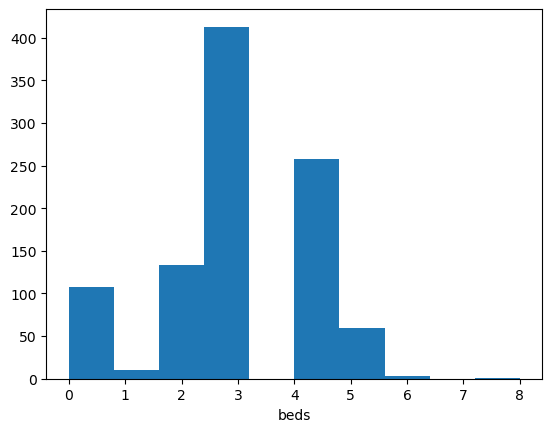

In [41]:
numbed =df['beds']

plt.hist(numbed)
plt.xlabel('beds')
plt.show()


# 3 rooms 

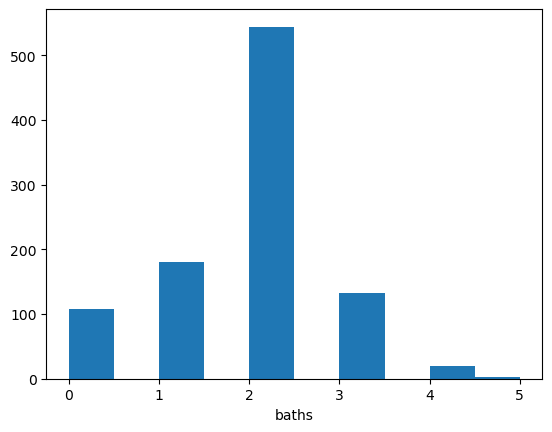

In [42]:
numbath=df['baths']

plt.hist(numbath)
plt.xlabel('baths')
plt.show()

# 2 baths

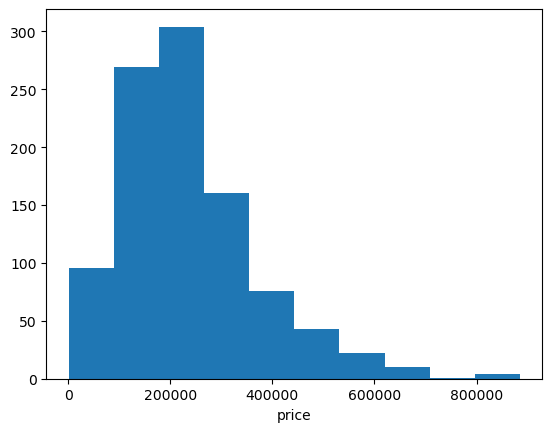

In [44]:
price =df['price']

plt.hist(price)
plt.xlabel('price')
plt.show()

# positive stew

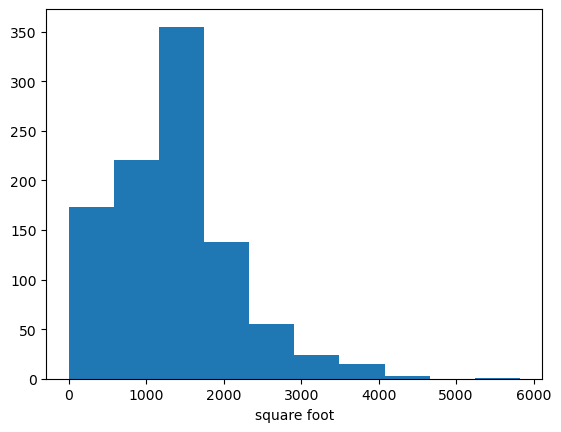

In [48]:
square_foot=df['sq__ft']

plt.hist(square_foot)
plt.xlabel('square foot')
plt.show()

# postive stew

In [ ]:
# find coef

#### 2.2 List all possible variables which might be Predictor variable.

In [ ]:
# ANSWER

coef of number or bedsand baths .
or sq_ft size.

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [ ]:
# ANSWER

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [ ]:
# ANSWER

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [ ]:
# ANSWER



#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [ ]:
# ANSWER

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [ ]:
# ANSWER

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [ ]:
# ANSWER

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [ ]:
# ANSWER

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [ ]:
# ANSWER

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [ ]:
# ANSWER

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [ ]:
# ANSWER

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

In [ ]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [ ]:
# ANSWER



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



